In [2]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file=r"C:\Users\LENOVO\Desktop\Study Material\CarDekho.csv"

In [3]:
df=pd.read_csv(file)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),Unnamed: 11,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

In [5]:
df.isna().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage (kmpl)     221
engine (CC)        221
max_power (bhp)    216
Unnamed: 11        222
seats              221
dtype: int64

In [6]:
df['mileage (kmpl)']=df['mileage (kmpl)'].fillna(df['mileage (kmpl)'].mean())
df['engine (CC)']=df['engine (CC)'].fillna(df['engine (CC)'].mean())
df['max_power (bhp)']=df['max_power (bhp)'].fillna(df['max_power (bhp)'].mean())
df['seats']=df['seats'].fillna(5)

In [7]:
df.isna().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage (kmpl)       0
engine (CC)          0
max_power (bhp)      0
Unnamed: 11        222
seats                0
dtype: int64

In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage (kmpl)', 'engine (CC)',
       'max_power (bhp)', 'Unnamed: 11', 'seats'],
      dtype='object')

In [9]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[['fuel', 'seller_type',
       'transmission', 'owner']]= oe.fit_transform(df[['fuel', 'seller_type',
       'transmission', 'owner']])

In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),Unnamed: 11,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1.0,1.0,1.0,0.0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1.0,1.0,1.0,2.0,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3.0,1.0,1.0,4.0,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1.0,1.0,1.0,0.0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,3.0,1.0,1.0,0.0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


<AxesSubplot:>

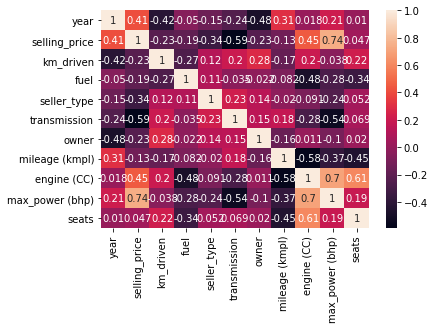

In [12]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df.corr()['selling_price']

year               0.414092
selling_price      1.000000
km_driven         -0.225534
fuel              -0.194029
seller_type       -0.335857
transmission      -0.588845
owner             -0.229174
mileage (kmpl)    -0.125454
engine (CC)        0.453567
max_power (bhp)    0.744958
seats              0.047135
Name: selling_price, dtype: float64

Text(0.5, 1.0, 'Comparison of selling price and Power generation of cars')

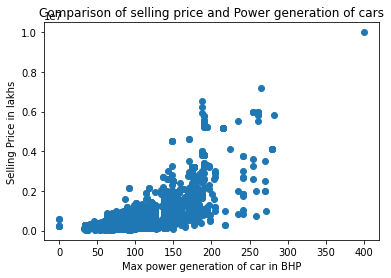

In [29]:
plt.scatter(data=df,x="max_power (bhp)",y="selling_price")
plt.ylabel("Selling Price in lakhs")
plt.xlabel("Max power generation of car in BHP")
plt.title("Comparison of selling price and Power generation of cars")

Text(0.5, 1.0, 'Comparison of Manufacturing year of the car and selling price of cars')

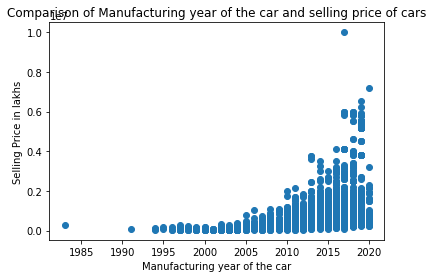

In [31]:
plt.scatter(data=df,x="year",y="selling_price")
plt.ylabel("Selling Price in lakhs")
plt.xlabel("Manufacturing year of the car")
plt.title("Comparison of Manufacturing year of the car and selling price of cars")

In [15]:
predictors=df[['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage (kmpl)', 'engine (CC)',
       'max_power (bhp)']]
target=df['selling_price']

In [16]:
from sklearn.model_selection import train_test_split
x_train,xtest,ytrain,ytest=train_test_split(predictors,target,test_size=0.2)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
params={
    'n_estimators': [50,100,200],
    'max_depth': [2,3,4,5,6,7,10]
}
model=GridSearchCV(RandomForestRegressor(random_state=1),params)
model.fit(x_train,ytrain)

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 10],
                         'n_estimators': [50, 100, 200]})

In [18]:
model.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [19]:
yhat=model.predict(xtest)

In [20]:
from sklearn.metrics import r2_score
print(r2_score(ytest,yhat))





0.9747425760021539


<AxesSubplot:ylabel='selling_price'>

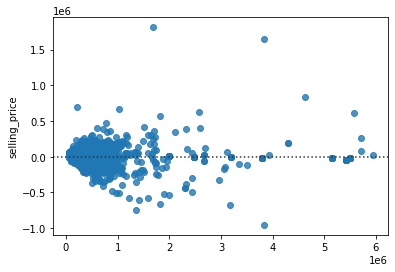

In [21]:
sns.residplot(x=yhat,y=ytest)

In [22]:
from sklearn import linear_model

In [23]:
regr=linear_model.LinearRegression()
regr.fit(x_train,ytrain)


LinearRegression()

In [24]:
yhat1=regr.predict(xtest)

In [25]:
r2_score(ytest,yhat1)

0.6603228706494417

<AxesSubplot:ylabel='selling_price'>

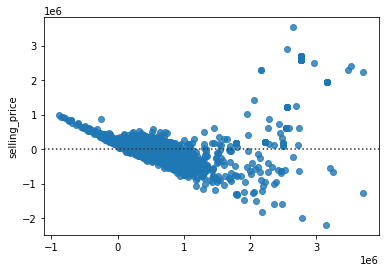

In [26]:
sns.residplot(x=yhat1,y=ytest)